# Midterm

### Q1. Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 

###### Loading all stock tickers as variables with the ticker symbol as their variable name


In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)  


Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
path =r'C:\\Users\\vinay\\Downloads\\StockData'
files = os.listdir(path = path)
#files
ans =[]
for f in files:
    lis = f.split('_')
    ans.append(lis[0])
print(ans)

['AABA', 'AAPL', 'all', 'all', 'AMZN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GE', 'GOOGL', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'WMT', 'XOM']


In [3]:
ans[2] = 'all0618'
ans[3] = 'all1718'

In [4]:
ans

['AABA',
 'AAPL',
 'all0618',
 'all1718',
 'AMZN',
 'AXP',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'DIS',
 'GE',
 'GOOGL',
 'GS',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'TRV',
 'UNH',
 'UTX',
 'VZ',
 'WMT',
 'XOM']

In [5]:
path =r'C:\\Users\\vinay\\Downloads\\StockData' # use your path
files = glob.glob(path + "\\*.csv")

for file, name in zip(files, ans):
    vars()[name] = pd.read_csv(file,index_col=None, header=0, parse_dates=['Date'], infer_datetime_format='%m-%d-%y')
    vars()[name].set_index('Date', inplace=True)


### Q2. Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.

###### the following depicts line graph for closing stocking prices of each stock in all csv file


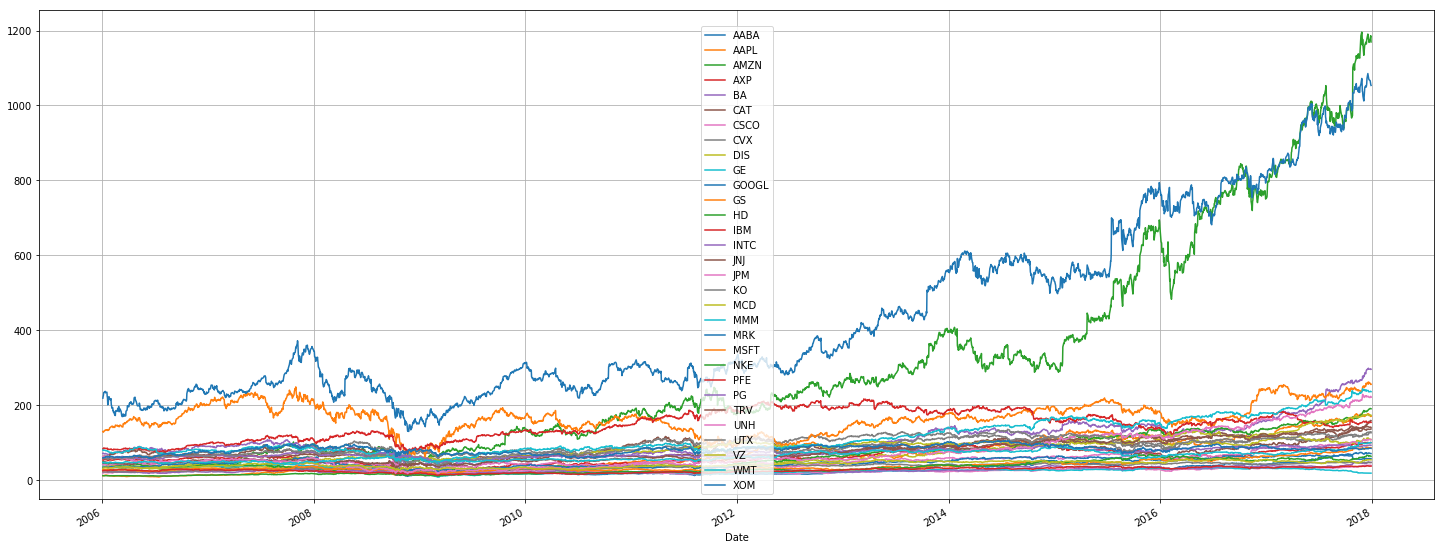

In [6]:
all0618.groupby('Name')['Close'].plot(grid=True,legend=True,figsize=(25,10))
pylab.legend(loc='lower center')
#pylab.rcParams['figure.figsize'] = (25, 14)  


###### the line graph below depicts the maximum 'High' for each stock in all time.

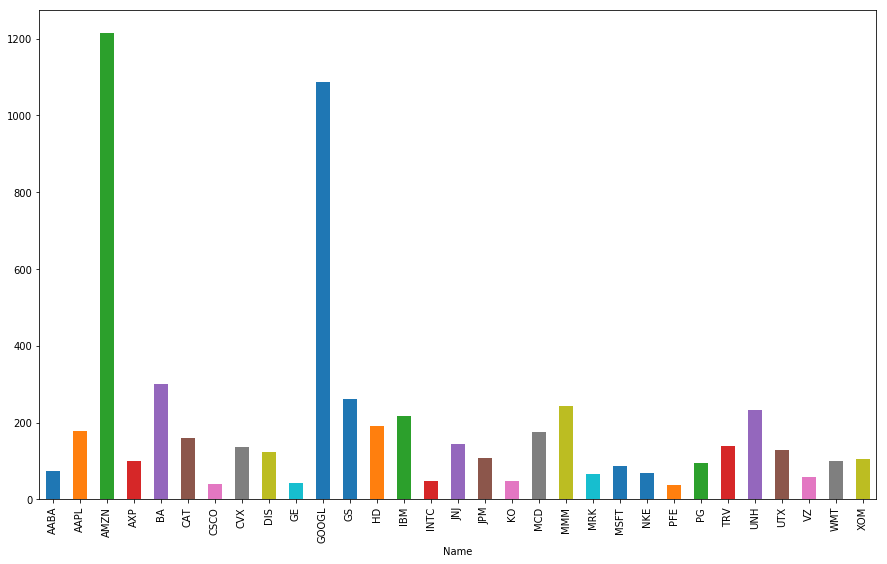

In [7]:
pylab.rcParams['figure.figsize'] = (15, 9)  
all0618.groupby('Name')['High'].max().plot.bar()

###### the line graph below depicts the minimum 'Low' for each stock in all time.

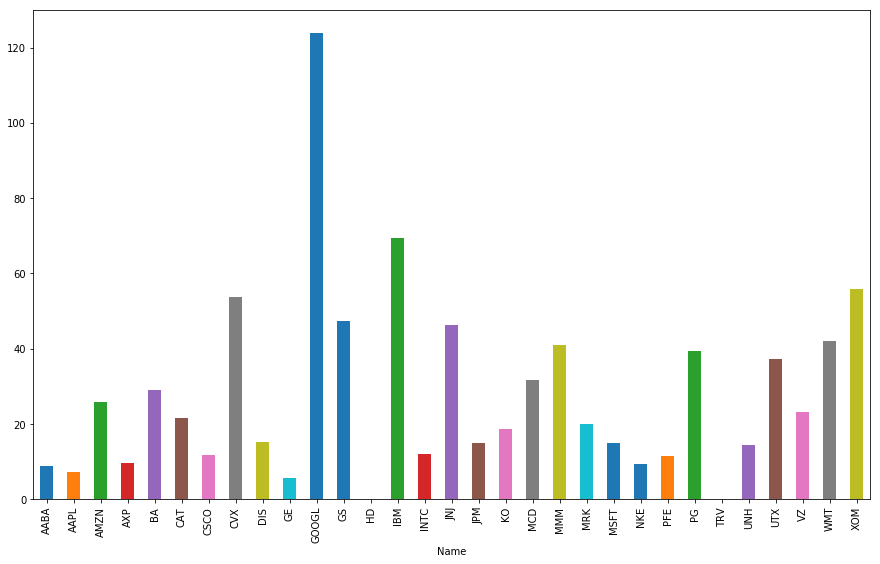

In [8]:
all0618.groupby('Name')['Low'].min().plot.bar()

###### the line graph below depicts the mean 'Volume' for each stock in all time.

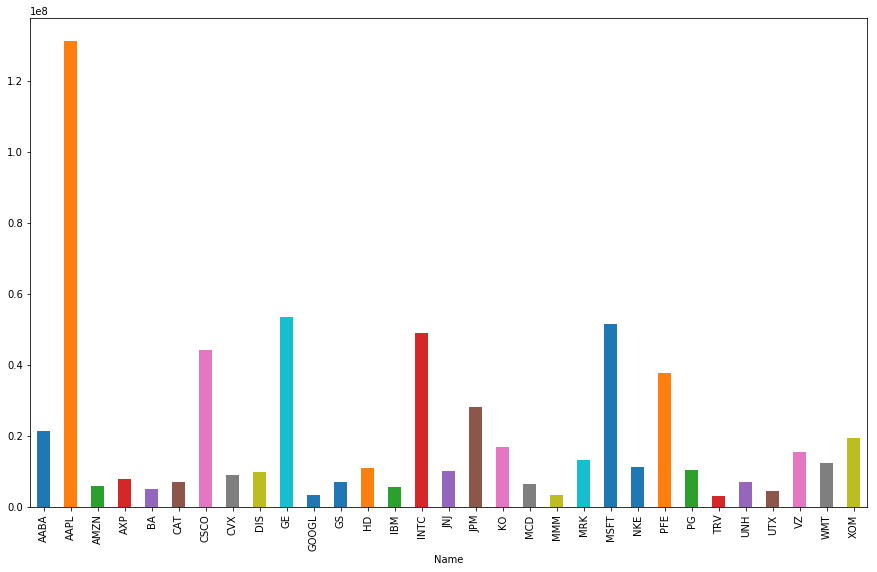

In [9]:
all0618.groupby('Name')['Volume'].mean().plot.bar()

### Q3. You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.

###### the line graph below depicts change in 'Close' for APPLE across the years.

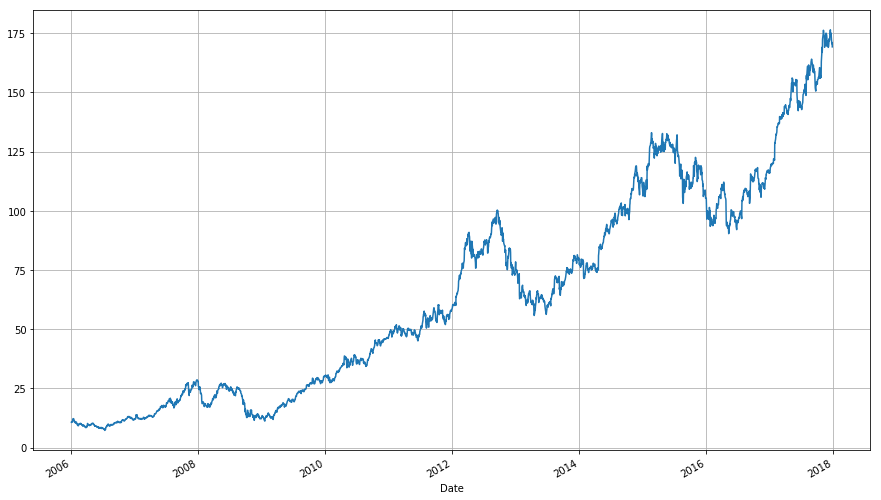

In [10]:
AAPL['Close'].plot(grid = True)

###### line graph below depicts the change in 'Close' from 2008 to 2010(recession period) for APPLE.

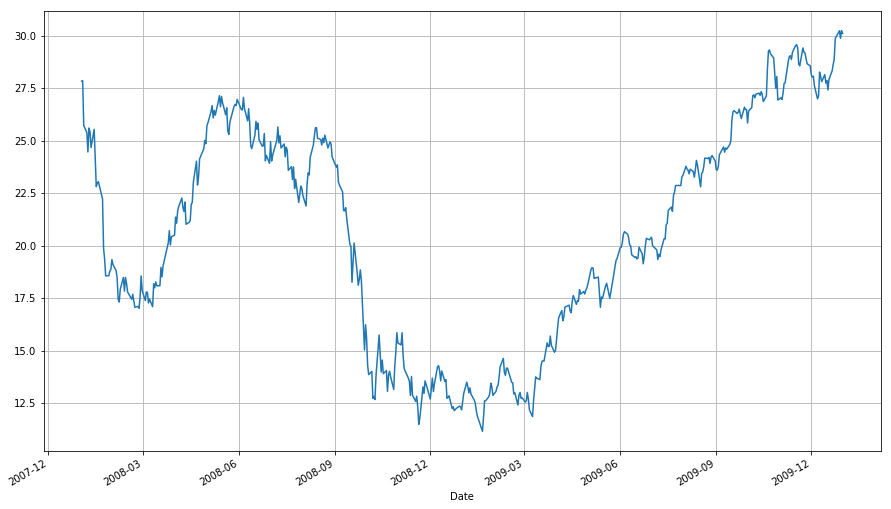

In [11]:
AAPL['1/1/2008':'1/1/2010']['Close'].plot(grid=True)

###### line graph below depicts the change in 'Close' from 2016 onwards for APPLE.

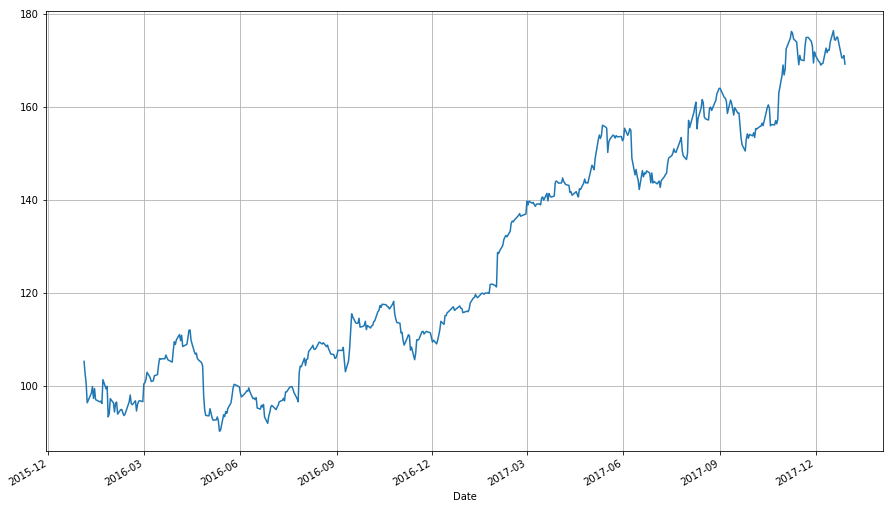

In [12]:
AAPL['1/1/2016':]['Close'].plot(grid=True)

###### line graph below depicts the moving average(50,200,500) in 'Close' for APPLE in all times.
###### Now, we can see the overall trend of closing stock prices.

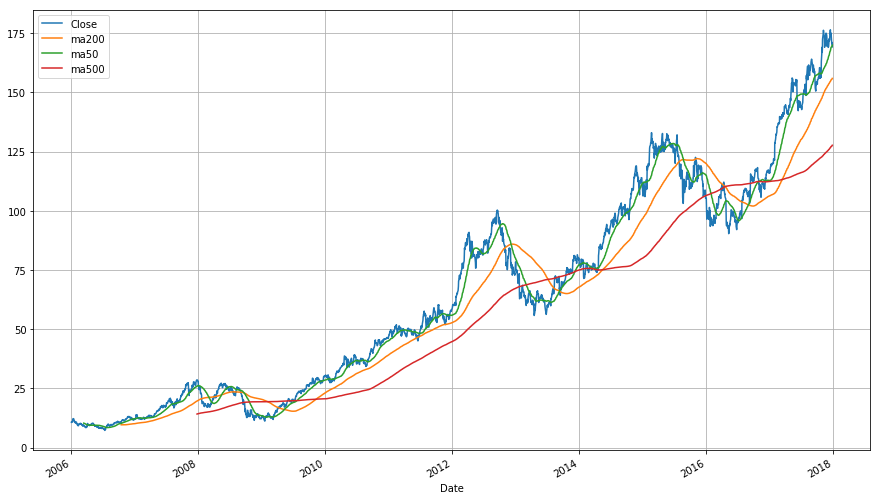

In [13]:
AAPL['ma50'] = AAPL['Close'].rolling(50).mean()
AAPL['ma200'] = AAPL['Close'].rolling(200).mean()
AAPL['ma500'] = AAPL['Close'].rolling(500).mean()
AAPL[['Close','ma200','ma50','ma500']].plot(grid=True)

###### line graph below depicts the 'Volume' in all times for APPLE. We can see there is decreasing trend.

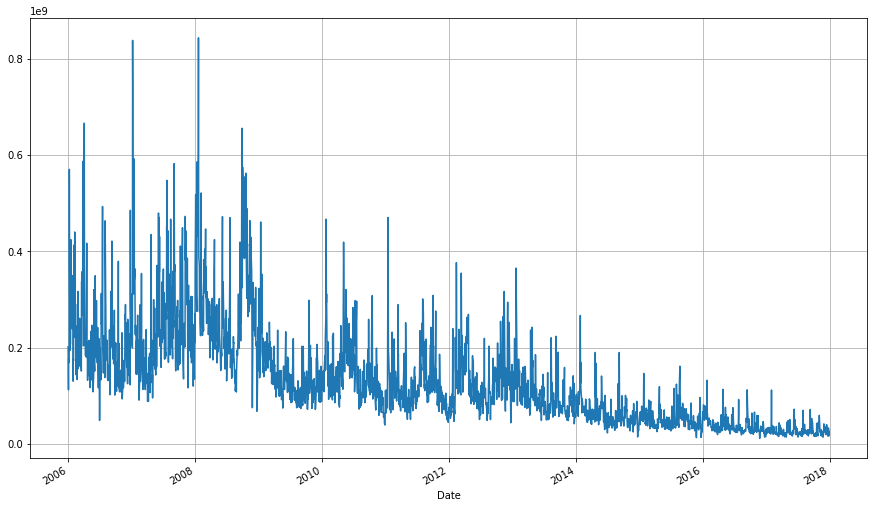

In [14]:
AAPL['Volume'].plot(grid=True)

###### line graph below depicts the return in all times for APPLE. We see a massive 1500% return. If someone had invested in Jan 2006.

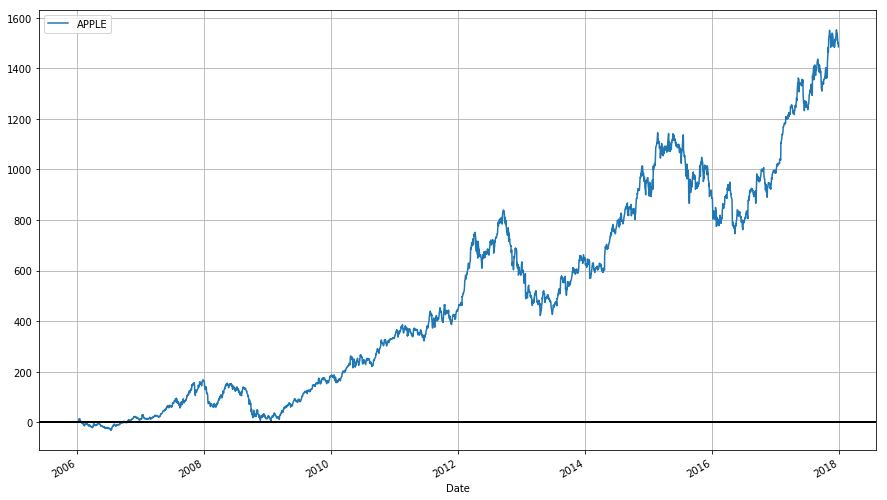

In [15]:
stocks_apple = pd.DataFrame({"APPLE": AAPL["Close"]})
apple_return = stocks_apple.apply(lambda x: ((x - x[0])/x[0])*100)
apple_return.head() - 1
apple_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

###### line graph below depicts the return from 2016 onwards for APPLE. We see a 60% return.

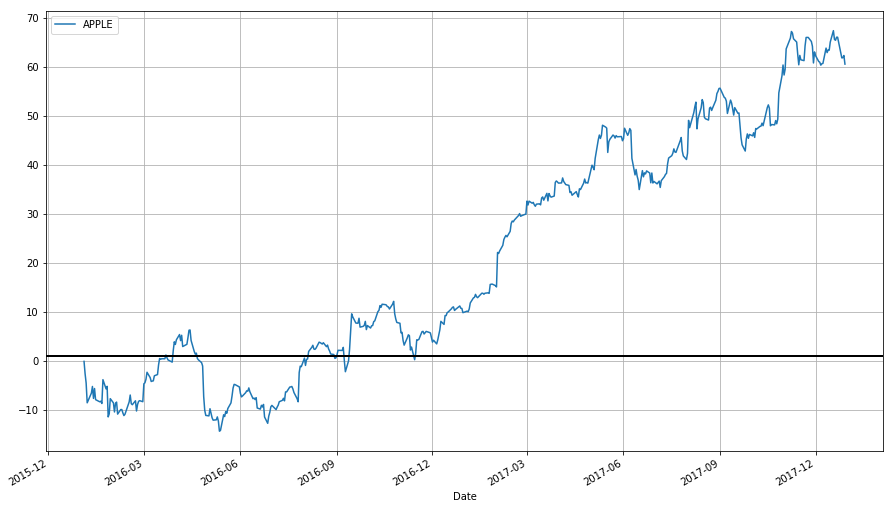

In [16]:
stocks_apple = pd.DataFrame({"APPLE": AAPL['1/1/2016':]["Close"]})
apple_return = stocks_apple.apply(lambda x: ((x - x[0])/x[0])*100)
apple_return.head() - 1
apple_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

###### line graph below depicts the return during the recession period for APPLE. We see a negative return. The solid line is no profit no loss line.

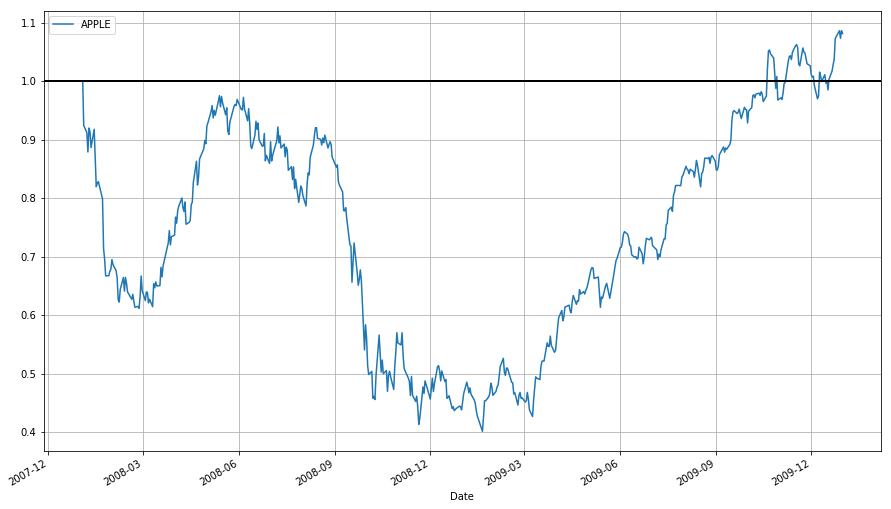

In [17]:
stocks_apple = pd.DataFrame({"APPLE": AAPL['1/1/2008':'1/1/2010']["Close"]})
apple_return = stocks_apple.apply(lambda x: x / x[0])
apple_return.head() - 1
apple_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

### Q4. Compare two stock’s descriptive analysis

##### Microsoft and Google are the two stocks

In [18]:
msftngoogl = pd.concat(objs = [MSFT,GOOGL])

In [19]:
stocks_msft_googl = pd.DataFrame({"MICROSOFT": msftngoogl[msftngoogl['Name']=='MSFT']["Close"],
                      "GOOGLE": msftngoogl[msftngoogl['Name']=='GOOGL']["Close"]})

###### the line graph below depicts the 'Close' for Microsoft and Google.

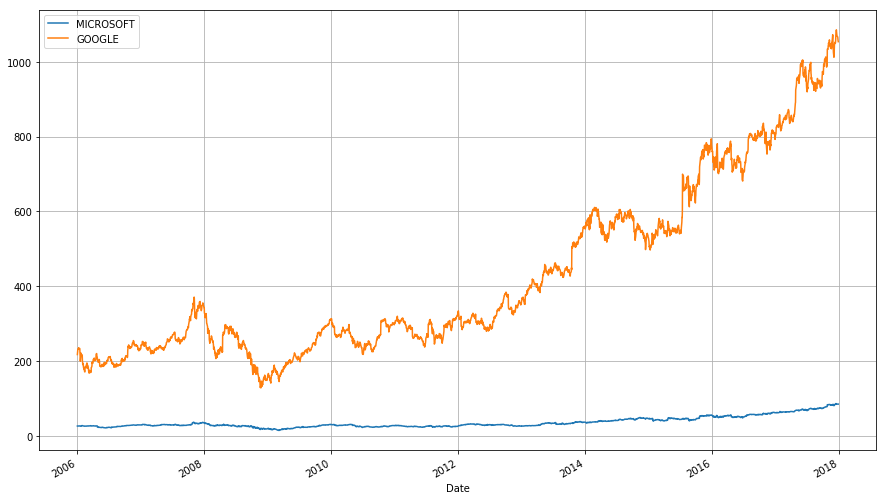

In [20]:
stocks_msft_googl.plot(grid = True)

###### the line graph below depicts the log transform of 'Close' for Microsoft and Google. We can see its almost the same for both stocks.

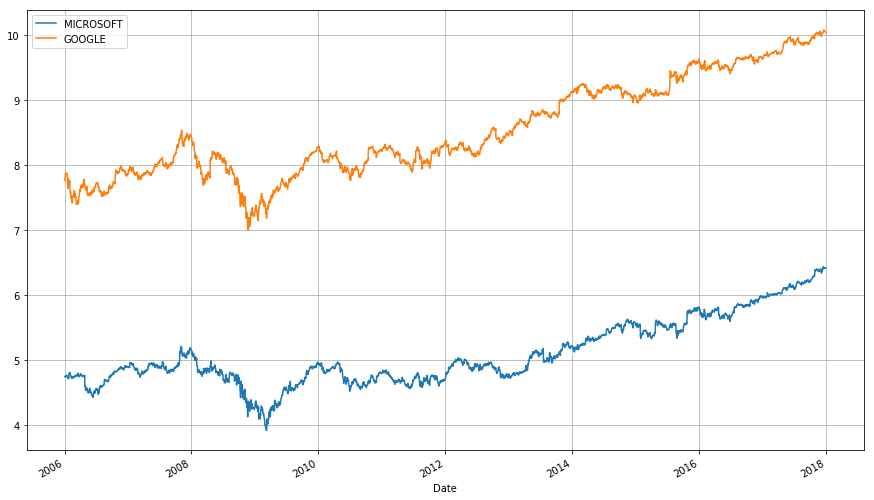

In [21]:
stocks_log = stocks_msft_googl.apply(lambda x: np.log2(x))
stocks_log.head() - 1
stocks_log.plot(grid = True)

###### the line graph below depicts the return for Microsoft and Google stocks. We see 500% return in Google and about 320% return in Microsoft. for someone invested in Jan 2006.

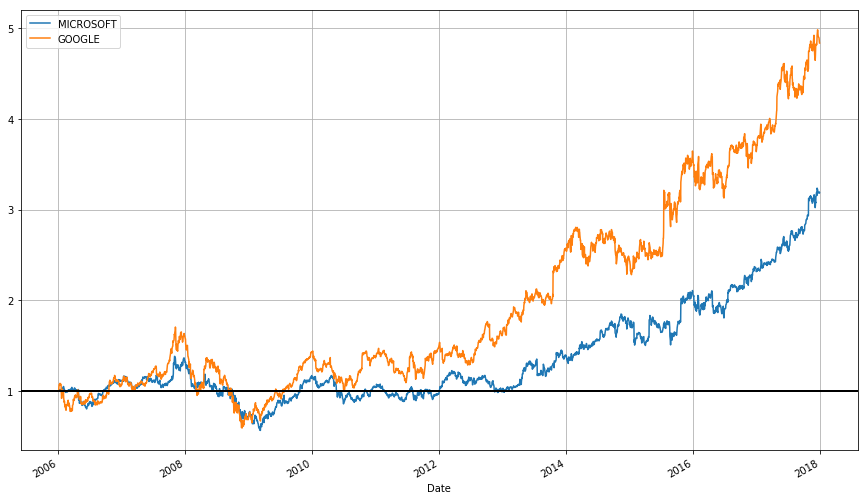

In [22]:
stock_return = stocks_msft_googl.apply(lambda x: x / x[0])
stock_return.head() - 1
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

##### we see from the plot below that there was negative return for Microsoft and Google for almost 5 years from 2008 (recession effect).

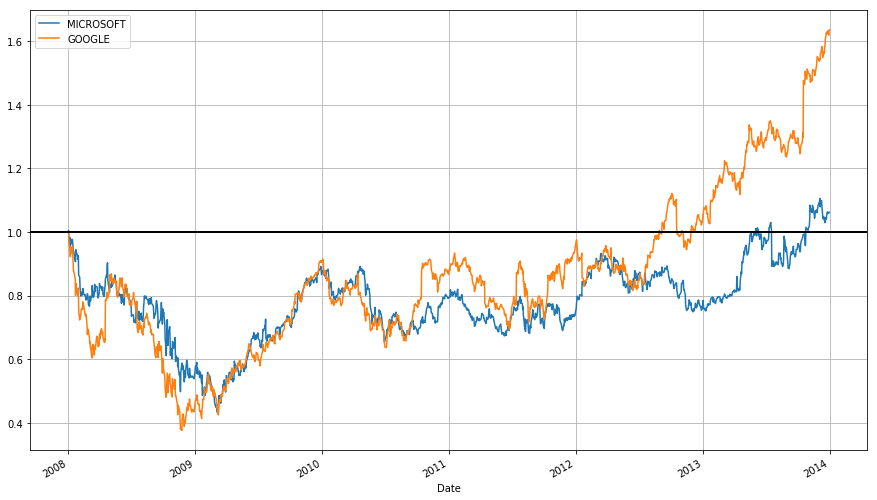

In [23]:
stock_return = stocks_msft_googl['1/1/2008':'1/1/2014'].apply(lambda x: x / x[0])
stock_return.head() - 1
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

###### the line graph below depicts the 'Volume' for Microsoft and Google. We see Microsoft has traded more.

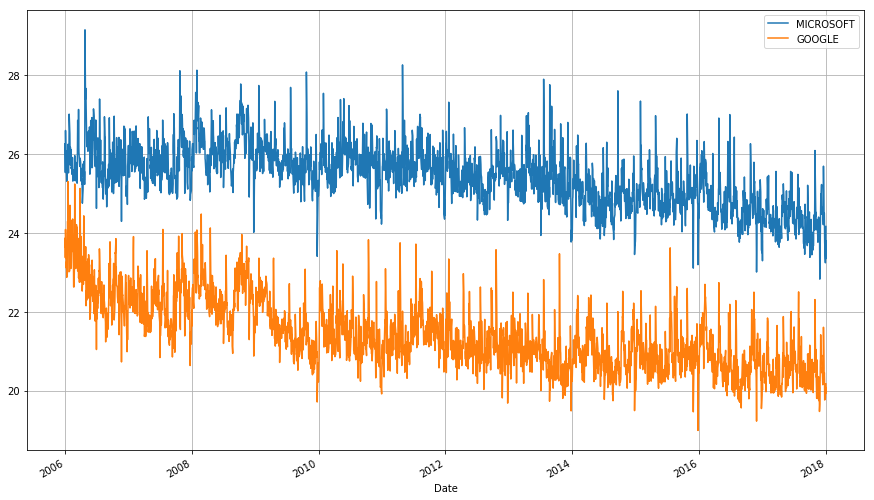

In [24]:
stocks_msft_googl = pd.DataFrame({"MICROSOFT": msftngoogl[msftngoogl['Name']=='MSFT']["Volume"],
                      "GOOGLE": msftngoogl[msftngoogl['Name']=='GOOGL']["Volume"]})
#stocks_msft_googl.plot(grid = True)
stocks_log = stocks_msft_googl.apply(lambda x: np.log2(x))
stocks_log.head() - 1
stocks_log.plot(grid = True)

###### the line graph below depicts moving average (200,500) for Google and Microsoft. The plot for Microsoft is not that clear so we take the log transform in the next plot.

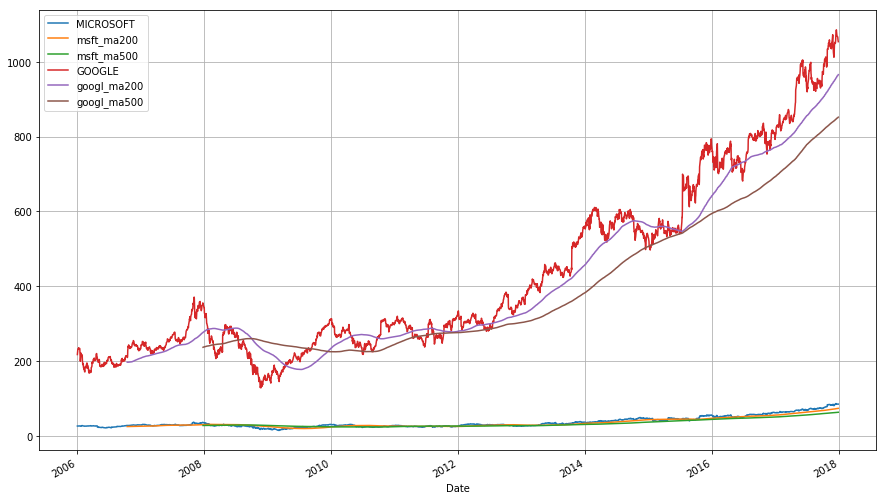

In [25]:
stocks_msft_googl = pd.DataFrame({"MICROSOFT": msftngoogl[msftngoogl['Name']=='MSFT']["Close"],
                      "GOOGLE": msftngoogl[msftngoogl['Name']=='GOOGL']["Close"]})
stocks_msft_googl['msft_ma200'] = stocks_msft_googl['MICROSOFT'].rolling(200).mean()
stocks_msft_googl['msft_ma500'] = stocks_msft_googl['MICROSOFT'].rolling(500).mean()
stocks_msft_googl['googl_ma200'] = stocks_msft_googl['GOOGLE'].rolling(200).mean()
stocks_msft_googl['googl_ma500'] = stocks_msft_googl['GOOGLE'].rolling(500).mean()
stocks_msft_googl[['MICROSOFT','msft_ma200','msft_ma500','GOOGLE','googl_ma200','googl_ma500']].plot(grid=True)


###### log transformed plot of moving average which gives us a better picture now.

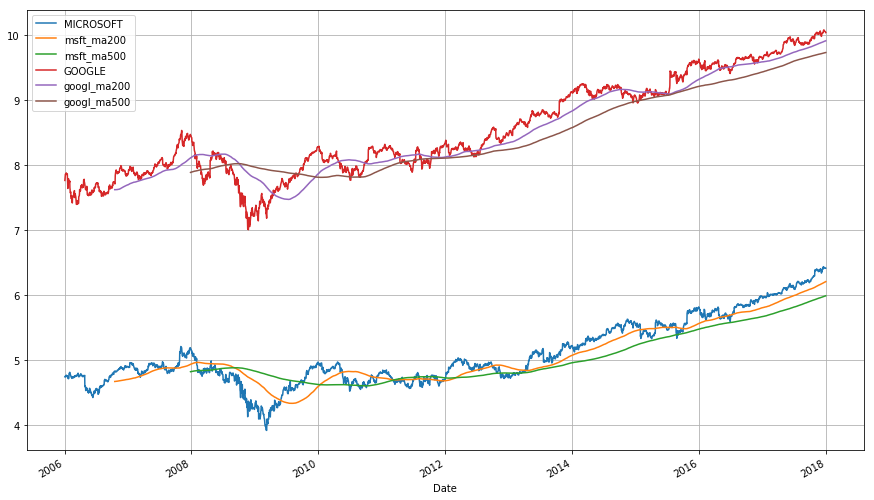

In [26]:
stocks_msft_googl = pd.DataFrame({"MICROSOFT": msftngoogl[msftngoogl['Name']=='MSFT']["Close"],
                      "GOOGLE": msftngoogl[msftngoogl['Name']=='GOOGL']["Close"]})
stocks_msft_googl['msft_ma200'] = stocks_msft_googl['MICROSOFT'].rolling(200).mean()
stocks_msft_googl['msft_ma500'] = stocks_msft_googl['MICROSOFT'].rolling(500).mean()
stocks_msft_googl['googl_ma200'] = stocks_msft_googl['GOOGLE'].rolling(200).mean()
stocks_msft_googl['googl_ma500'] = stocks_msft_googl['GOOGLE'].rolling(500).mean()
stocks_msft_googl_log=stocks_msft_googl[['MICROSOFT','msft_ma200','msft_ma500','GOOGLE','googl_ma200','googl_ma500']].apply(lambda x: np.log2(x))
stocks_msft_googl_log.plot(grid=True)

### Q5. Take five stocks of your choice and create the same type of report stated in question 4.

##### the five stocks are Microsoft, Google, IBM, Verizon, Amazon
##### the line graph below depicts the 'Close' for each of the five stock.

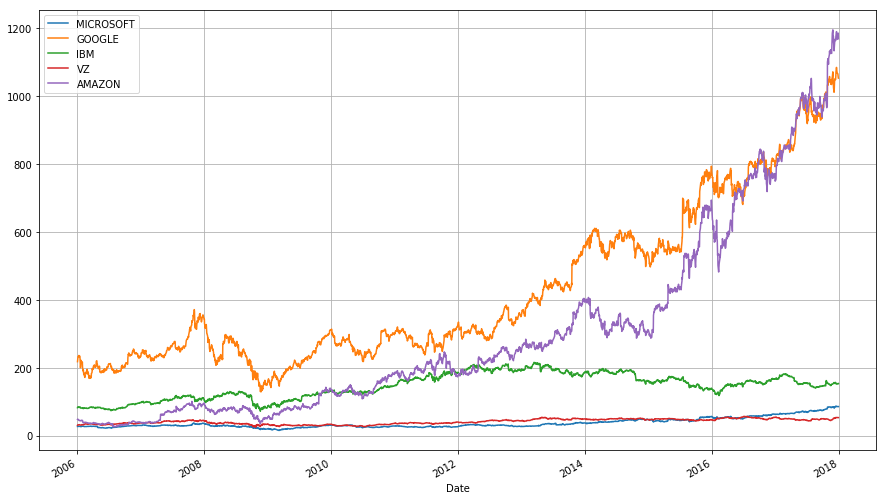

In [27]:
stocks_5 = pd.DataFrame({"MICROSOFT": all0618[all0618['Name']=='MSFT']["Close"],
                      "GOOGLE": all0618[all0618['Name']=='GOOGL']["Close"],
                      "IBM": all0618[all0618['Name']=='IBM']["Close"],
                      "VZ": all0618[all0618['Name']=='VZ']["Close"],
                      "AMAZON": all0618[all0618['Name']=='AMZN']["Close"]})
#stocks_msft_googl.plot(grid = True)
#stocks_log = stocks_5.apply(lambda x: np.log2(x))
#stocks_log.head() - 1
stocks_5.plot(grid = True)

###### the below is a log transfomed model for the above plot. It gives the rate of change. We also see a dip in stocks prices from 2008 to 2010 during to recession.

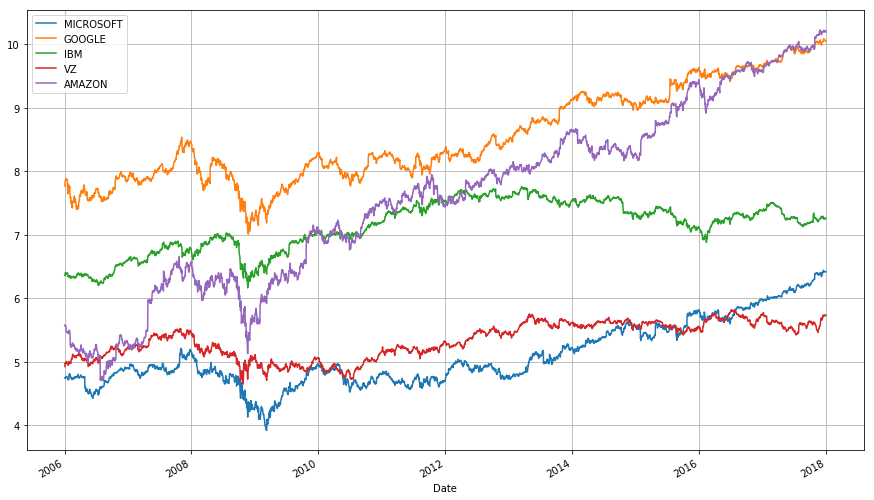

In [28]:
stocks_5 = pd.DataFrame({"MICROSOFT": all0618[all0618['Name']=='MSFT']["Close"],
                      "GOOGLE": all0618[all0618['Name']=='GOOGL']["Close"],
                      "IBM": all0618[all0618['Name']=='IBM']["Close"],
                      "VZ": all0618[all0618['Name']=='VZ']["Close"],
                      "AMAZON": all0618[all0618['Name']=='AMZN']["Close"]})
#stocks_msft_googl.plot(grid = True)
stocks_log = stocks_5.apply(lambda x: np.log2(x))
stocks_log.head() - 1
stocks_log.plot(grid = True)

##### if we compare the returns of all five stocks, we get something like below.
#####  we clearly see the returns from amazon exceeds by a huge margin.

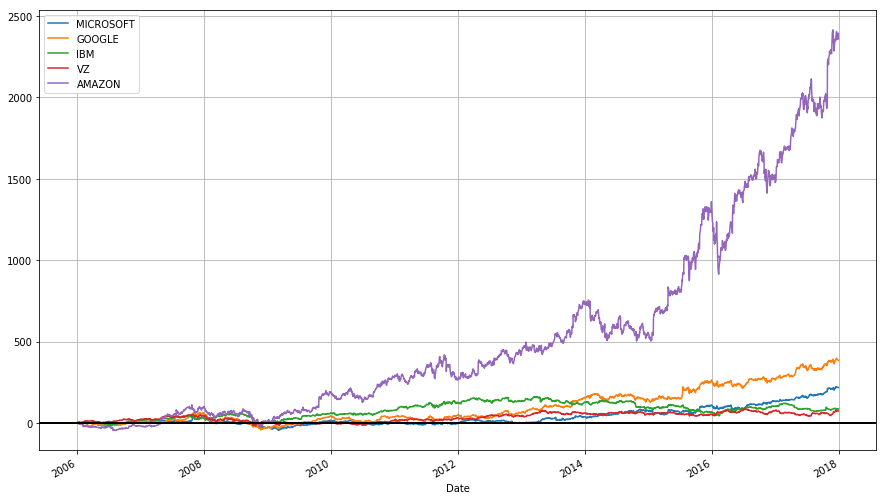

In [29]:
stock_return = stocks_5.apply(lambda x: ((x - x[0])/x[0])*100)
stock_return.head() - 1
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

##### below is the line graph for 'Volume' of each stock. We see Microsoft leads most times.

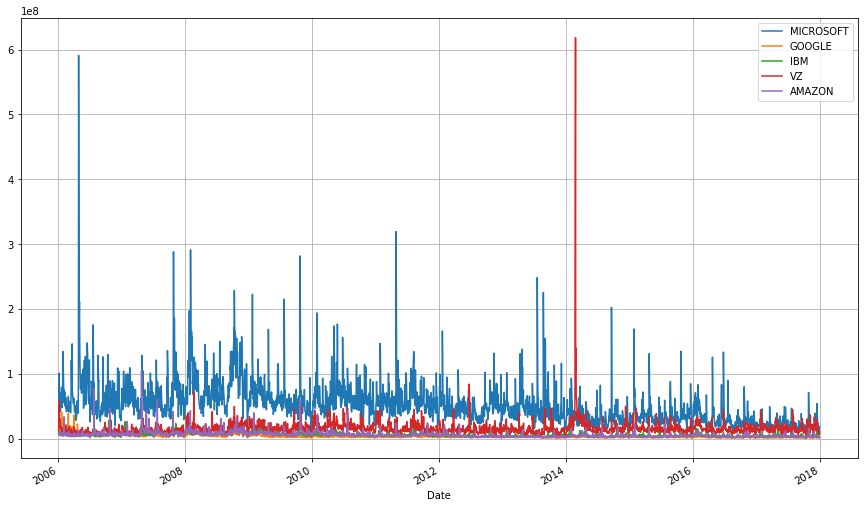

In [30]:
stocks_5 = pd.DataFrame({"MICROSOFT": all0618[all0618['Name']=='MSFT']["Volume"],
                      "GOOGLE": all0618[all0618['Name']=='GOOGL']["Volume"],
                      "IBM": all0618[all0618['Name']=='IBM']["Volume"],
                      "VZ": all0618[all0618['Name']=='VZ']["Volume"],
                      "AMAZON": all0618[all0618['Name']=='AMZN']["Volume"]})
#stocks_msft_googl.plot(grid = True)
#stocks_log = stocks_5.apply(lambda x: np.log2(x))
#stocks_log.head() - 1
stocks_5.plot(grid = True)